In [2]:
"""
Visualization for a small subset of Carat data containing system settings of Facebook mobile app users.

Author: Jiri Hamberg (jiri.hamberg@cs.helsinki.fi)
"""

import numpy as np
import pandas

fb_data_path = "/mnt/cs/home/Projects/carat-test/singlesamples-from-2016-08-26-to-2016-10-03-facebook-and-features-text-discharge-noinfs.csv"

column_names = (
    'rate',
    'cpu',
    'distance',
    'temp',
    'voltage',
    'screen',
    'mobile_network',
    'network',
    'wifi_strength',
    'wifi_speed'
)

fb_data = pandas.read_csv(fb_data_path, sep=';', header = None, names = column_names)

fb_data

,rate,cpu,distance,temp,voltage,screen,mobile_network,network,wifi_strength,wifi_speed
0,0.032258,0.850000,0.0,31.0,3.0,-1,lte,wifi,-50,40
1,0.011111,0.617849,0.0,32.0,3.0,-1,lte,wifi,-50,40
2,0.011111,0.720621,0.0,32.0,3.0,-1,lte,wifi,-48,40
3,0.016667,0.790870,0.0,33.0,3.0,-1,lte,wifi,-52,40
4,0.011111,0.664297,0.0,33.0,3.0,-1,lte,wifi,-50,40
5,0.513089,0.299832,0.0,27.0,4.0,-1,lte,wifi,-47,13
6,0.008333,0.297619,0.0,28.0,4.0,-1,lte,wifi,-53,40
7,0.000816,0.835341,0.0,27.0,4.0,-1,lte,wifi,-54,40
8,0.000540,0.850427,0.0,25.0,4.0,-1,lte,wifi,-54,40
9,0.000834,0.370203,0.0,26.0,4.0,-1,lte,wifi,-48,40


In [3]:
import scipy.stats as stats
from scipy.stats.kde import gaussian_kde
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

# Energy Rate Distribution

In [4]:
stats.describe(fb_data['rate'])

DescribeResult(nobs=908970, minmax=(0.0, 98.0), mean=0.066970800499063204, variance=1.5753162853440879, skewness=51.907055374125264, kurtosis=3347.7442607488565)

In [5]:
np.percentile(fb_data['rate'], [25.0, 50.0, 75.0, 90.0, 95.0])

array([ 0.00112486,  0.00383142,  0.00826446,  0.01666667,  0.04166667])

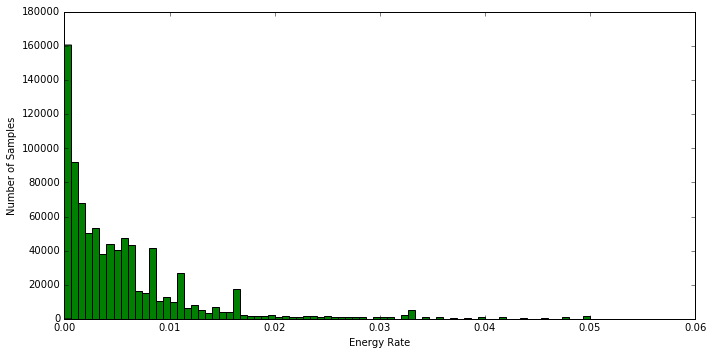

In [6]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(fb_data['rate'], 75, normed=False, range=[0.0, 0.05], color='green')
ax.set_xlabel('Energy Rate')
ax.set_ylabel('Number of Samples')
fig.tight_layout()
plt.show()

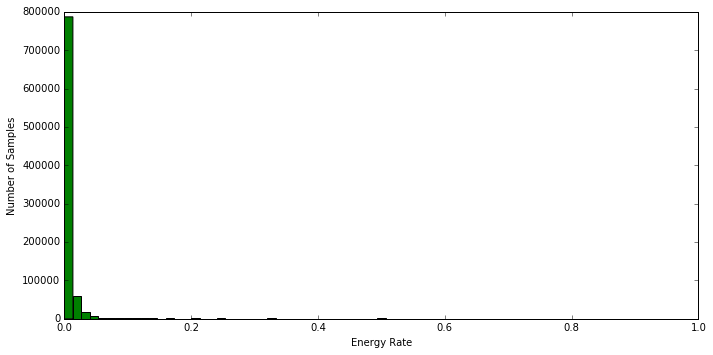

In [7]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(fb_data['rate'], 75, normed=False, range=[-0.0, 1.0], color='green')
ax.set_xlabel('Energy Rate')
ax.set_ylabel('Number of Samples')
fig.tight_layout()
plt.show()

# CPU Level Distribution

In [8]:
stats.describe(fb_data['cpu'])

DescribeResult(nobs=908970, minmax=(-448.0, 234.5), mean=0.5932329225542029, variance=0.73343044554079539, skewness=-231.38479306725353, kurtosis=123190.09921407513)

In [9]:
np.percentile(fb_data['cpu'],  [25.0, 50.0, 75.0, 90.0, 95.0])

array([ 0.38461538,  0.62169312,  0.84615385,  0.98395722,  1.        ])

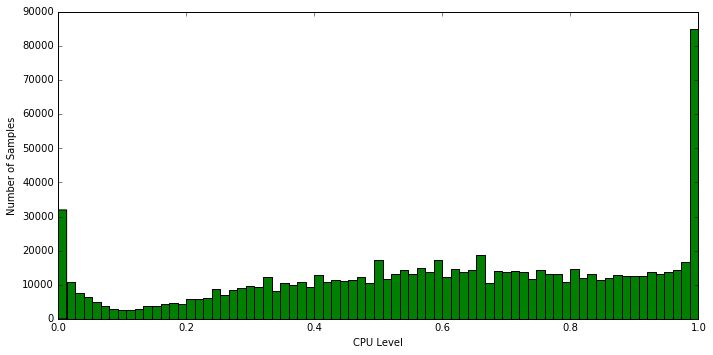

In [10]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(fb_data['cpu'], 75, normed=False, range=[0, 1.0], color='green')
ax.set_xlabel('CPU Level')
ax.set_ylabel('Number of Samples')
fig.tight_layout()
plt.show()

# Travel Distance Distribution

In [11]:
stats.describe(fb_data['distance'])

DescribeResult(nobs=908970, minmax=(0.0, 14277378.0), mean=2767.5080453444666, variance=20625813654.384895, skewness=66.75916420504451, kurtosis=4559.8426722696095)

In [12]:
np.percentile(fb_data['distance'],  [25.0, 50.0, 75.0, 90.0, 95.0, 99.0, 99.9])

array([      0.        ,       0.        ,       0.        ,
             0.        ,    2006.5020752 ,    9742.71743164,
        105767.4765625 ])

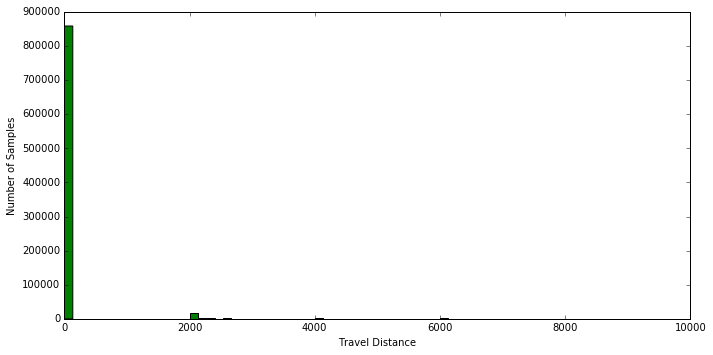

In [13]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(fb_data['distance'], 75, normed=False, range=[0, 1.0e4], color='green')
ax.set_xlabel('Travel Distance')
ax.set_ylabel('Number of Samples')
fig.tight_layout()
plt.show()

# Temperature Distribution

In [14]:
stats.describe(fb_data['temp'])

DescribeResult(nobs=908970, minmax=(-30.0, 71.0), mean=30.648997216629812, variance=32.67211666290374, skewness=-1.0613717967323675, kurtosis=6.038878910478669)

In [15]:
np.percentile(fb_data['temp'],  [0.01, 0.05, 5.0, 25.0, 50.0, 75.0, 90.0, 95.0])

array([-11.,   0.,  23.,  27.,  31.,  34.,  37.,  39.])

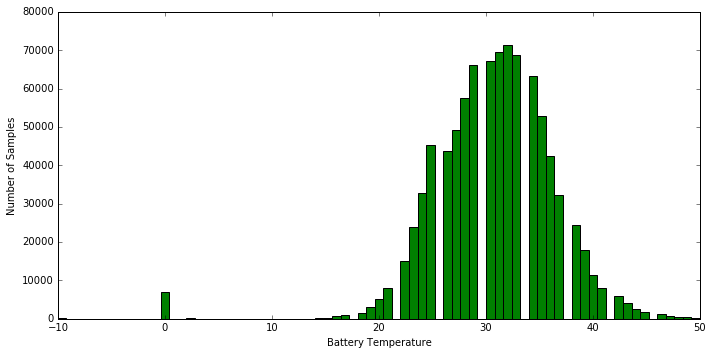

In [16]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(fb_data['temp'], 75, normed=False, range=[-10, 50], color='green')
ax.set_xlabel('Battery Temperature')
ax.set_ylabel('Number of Samples')
fig.tight_layout()
plt.show()

# Voltage Distribution

In [17]:
stats.describe(fb_data['voltage'])

DescribeResult(nobs=908970, minmax=(0.0, 12.0), mean=3.3073438254287821, variance=0.3680997564518374, skewness=-0.126241839236835, kurtosis=21.58019102222318)

In [18]:
np.percentile(fb_data['voltage'],  [5.0, 25.0, 50.0, 75.0, 90.0, 95.0])

array([ 3.,  3.,  3.,  4.,  4.,  4.])

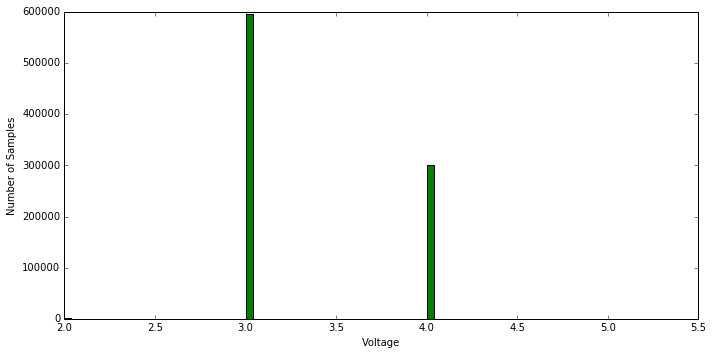

In [19]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(fb_data['voltage'], 75, normed=False, range=[2, 5], color='green')
ax.set_xlabel('Voltage')
ax.set_ylabel('Number of Samples')
fig.tight_layout()
plt.show()

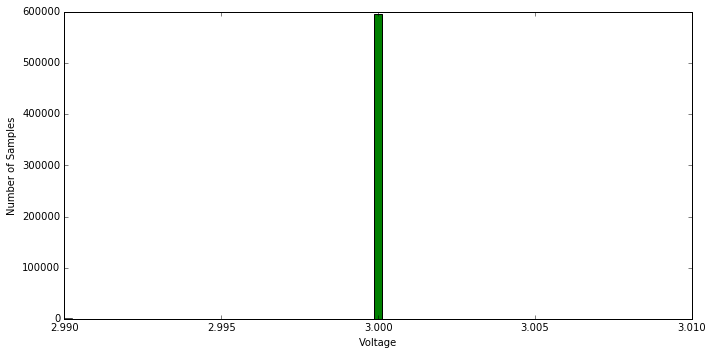

In [20]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(fb_data['voltage'], 75, normed=False, range=[2.99, 3.01], color='green')
ax.set_xlabel('Voltage')
ax.set_ylabel('Number of Samples')
fig.tight_layout()
plt.show()

# Screen Brightness Distribution

In [21]:
stats.describe(fb_data['screen'])

DescribeResult(nobs=908970, minmax=(-1, 255), mean=54.557015083006043, variance=6870.5600957715005, skewness=1.3257031240436679, kurtosis=0.39640180582041884)

In [22]:
np.percentile(fb_data['screen'],  [25.0, 50.0, 75.0, 90.0, 95.0])

array([  -1.,   -1.,  100.,  206.,  255.])

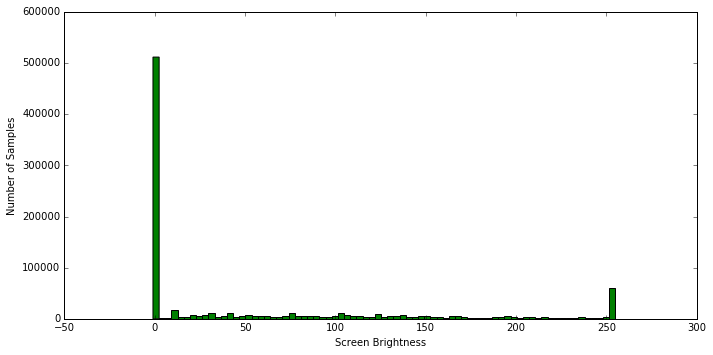

In [23]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(fb_data['screen'], 75, normed=False, range=[-1.0, 255], color='green')
ax.set_xlabel('Screen Brightness')
ax.set_ylabel('Number of Samples')
fig.tight_layout()
plt.show()

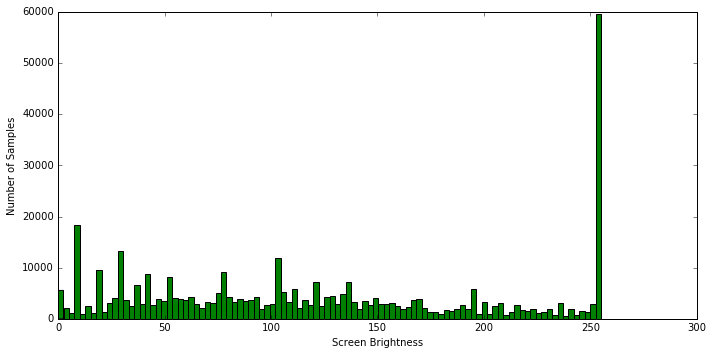

In [24]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(fb_data['screen'], 100, normed=False, range=[0, 255], color='green')
ax.set_xlabel('Screen Brightness')
ax.set_ylabel('Number of Samples')
fig.tight_layout()
plt.show()

# Mobile Network Type Distribution

In [25]:
from collections import Counter
network_type_counter = Counter(fb_data['mobile_network'])
network_type_counter

Counter({'lte': 472175, '0': 112330, 'hspa': 103546, 'utms': 56764, 'hspap': 47630, 'edge': 45845, 'hsdpa': 27293, 'hsupa': 13091, 'ehrpd': 10978, '18': 9439, 'gprs': 5440, '1xrtt': 1848, 'evdo_a': 1764, 'unknown': 292, '16': 247, '30': 155, '19': 93, 'cdma': 31, 'null': 8, 'evdo_0': 1})

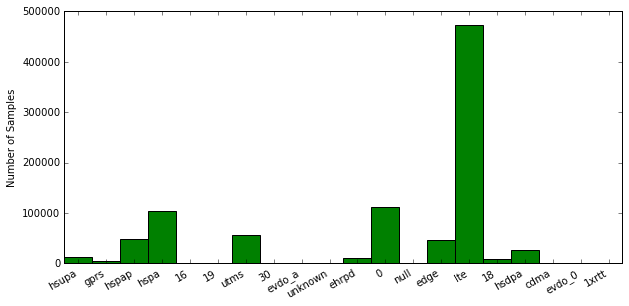

In [26]:
nt_labels, nt_values = zip(*network_type_counter.items())
nt_indices = np.arange(len(nt_labels))
width = 1
fig, ax = plt.subplots()
ax.set_ylabel('Number of Samples')
ax.bar(nt_indices, nt_values, width, color = 'green')
plt.xticks(nt_indices + width * 0.5, nt_labels)
fig.autofmt_xdate()
plt.show()

# Network Distribution

In [27]:
from collections import Counter
network_counter = Counter(fb_data['network'])
network_counter

Counter({'wifi': 513566, 'mobile': 302024, 'unknown': 93257, 'bluetooth tethering': 115, 'null': 8})

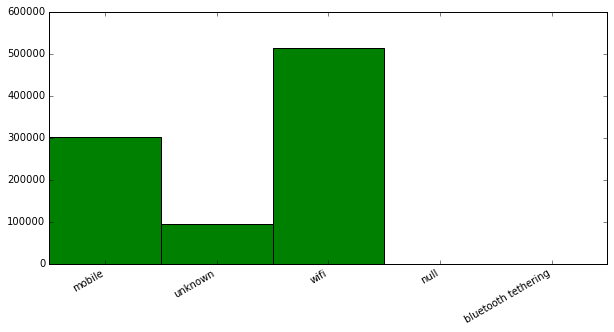

In [28]:
n_labels, n_values = zip(*network_counter.items())
n_indices = np.arange(len(n_labels))
width = 1
fig, ax = plt.subplots()
ax.bar(n_indices, n_values, width, color = 'green')
plt.xticks(n_indices + width * 0.5, n_labels)
fig.autofmt_xdate()
plt.show()

# Wifi Strength Distribution

In [29]:
stats.describe(fb_data['wifi_strength'])

DescribeResult(nobs=908970, minmax=(-9999, 0), mean=-823.59545749584697, variance=6714531.2946358379, skewness=-3.2574111270119497, kurtosis=8.614950220202429)

In [30]:
np.percentile(fb_data['wifi_strength'],  [25.0, 50.0, 75.0, 90.0, 95.0, 99.0, 99.99])

array([-127.,  -75.,  -57.,  -47.,  -42.,  -33.,  -10.])

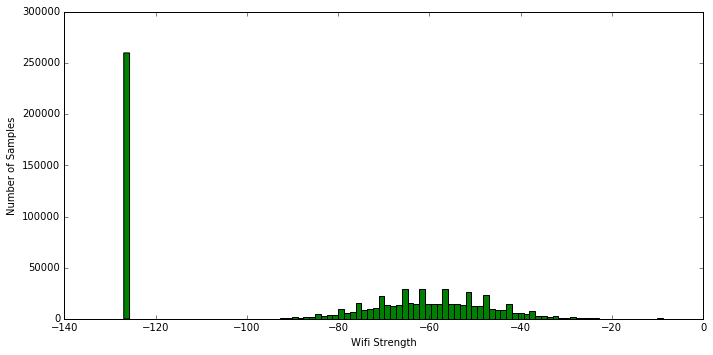

In [31]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(fb_data['wifi_strength'], 100, normed=False, range=[-127, 0], color='green')
ax.set_xlabel('Wifi Strength')
ax.set_ylabel('Number of Samples')
fig.tight_layout()
plt.show()

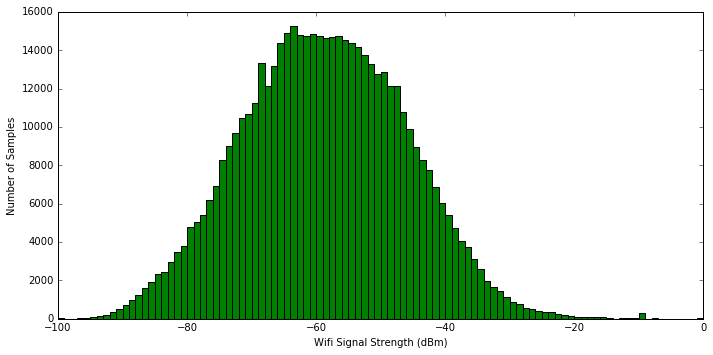

In [37]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(fb_data['wifi_strength'], 100, normed=False, range=[-100, 0], color='green')
ax.set_xlabel('Wifi Signal Strength (dBm)')
ax.set_ylabel('Number of Samples')
fig.tight_layout()
plt.show()

# Wifi Speed Distribution


In [38]:
stats.describe(fb_data['wifi_speed'])

DescribeResult(nobs=908970, minmax=(-1, 866), mean=65.516604508399624, variance=14655.34096310013, skewness=3.7904013766596227, kurtosis=17.697548890288044)

In [39]:
np.percentile(fb_data['wifi_speed'],  [0, 25.0, 50.0, 75.0, 90.0, 95.0, 99.0, 99.99])

array([  -1.,   -1.,   26.,   72.,  144.,  292.,  702.,  866.])

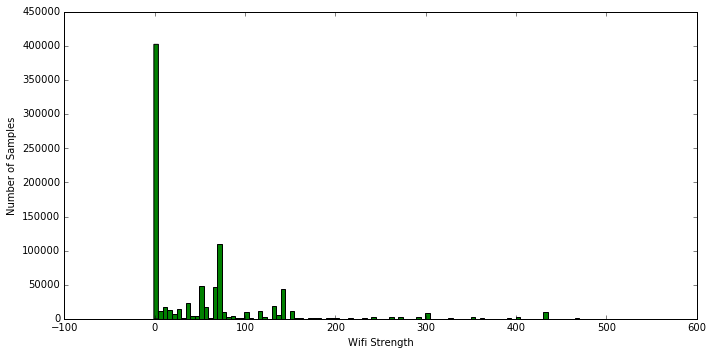

In [40]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(fb_data['wifi_speed'], 100, normed=False, range=[-1, 500], color='green')
ax.set_xlabel('Wifi Strength')
ax.set_ylabel('Number of Samples')
fig.tight_layout()
plt.show()

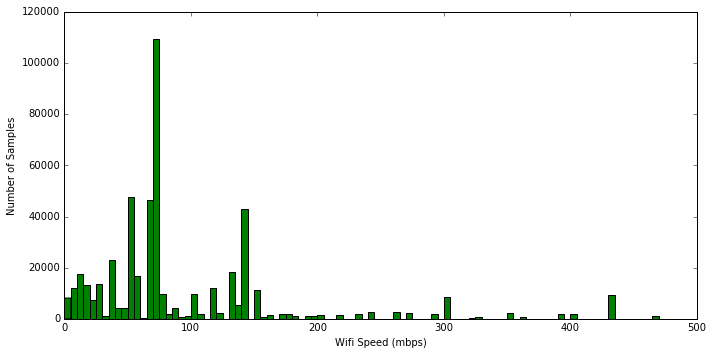

In [42]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(fb_data['wifi_speed'], 100, normed=False, range=[0, 500], color='green')
ax.set_xlabel('Wifi Speed (mbps)')
ax.set_ylabel('Number of Samples')
fig.tight_layout()
plt.show()